# Imports

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt

from skimage import io
import skimage

# Download and organize the dataset (No Code required here)

In [ ]:
%%capture

import requests
url = 'http://vision.soic.indiana.edu/egohands_files/egohands_data.zip'
r = requests.get(url, allow_redirects=True)
open('egohands_data.zip', 'wb').write(r.content)

!rm -r data
!rm -r temp
!mkdir data
!mkdir temp
!unzip egohands_data.zip -d temp/
!cp -r /content/temp/_LABELLED_SAMPLES/CARDS_OFFICE_B_S/* /content/data/
!rm /content/data/polygons.mat
!rm -r temp

# Read the images from the folder 'data' into a list



In [ ]:
# os.listdir <-- you may want to use this function

dataset_dir = "data" # this is the directory of the dataset

# Your code here
imgs = []

# Iterate over files in the directory
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):
        # Read the image and append it to the list
        img_path = os.path.join(dataset_dir, filename)
        img = io.imread(img_path)
        imgs.append(img)

# Print the number of images read
print("Number of images read:", len(imgs))


Number of images read: 100


# Define a function that takes a list of images then samples 9 images from the list, then draws them using matplotlib in a 3x3 grid

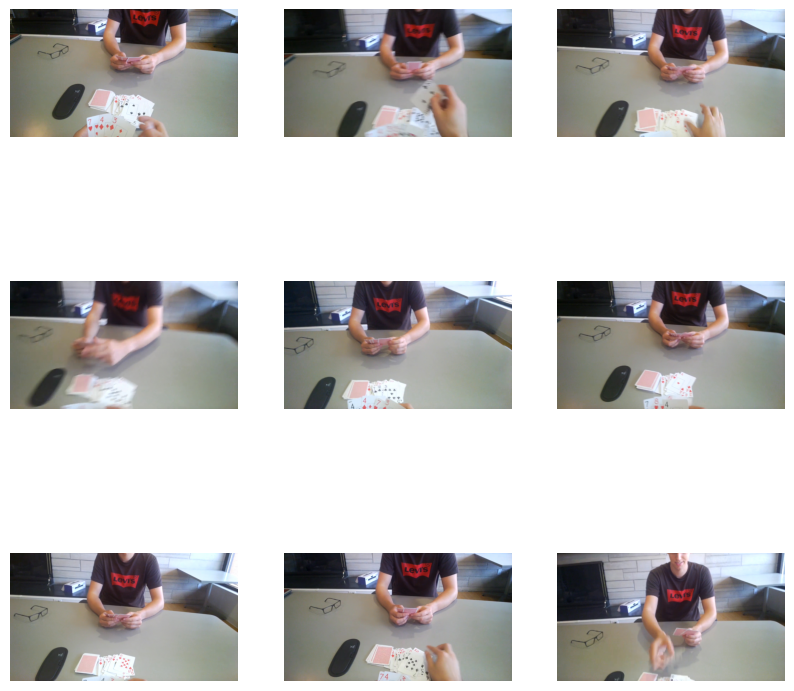

In [ ]:
import random # u may need this library
random.seed(100) # set a seed in case you want your experiments to be consistent

def draw_func(list_of_imgs):
  # Your code here
  sampled_imgs = random.sample(list_of_imgs, 9)

  # Create a 3x3 subplot grid
  fig, axes = plt.subplots(3, 3, figsize=(10, 10))

  # Plot each sampled image
  for i, img in enumerate(sampled_imgs):
      row = i // 3
      col = i % 3
      axes[row, col].imshow(img, cmap=plt.cm.gray)
      axes[row, col].axis('off')
  ##
  plt.show()

## Test your function here
draw_func(imgs) # assuming that imgs is the name of the list
##

# Apply Gray scaling on the images

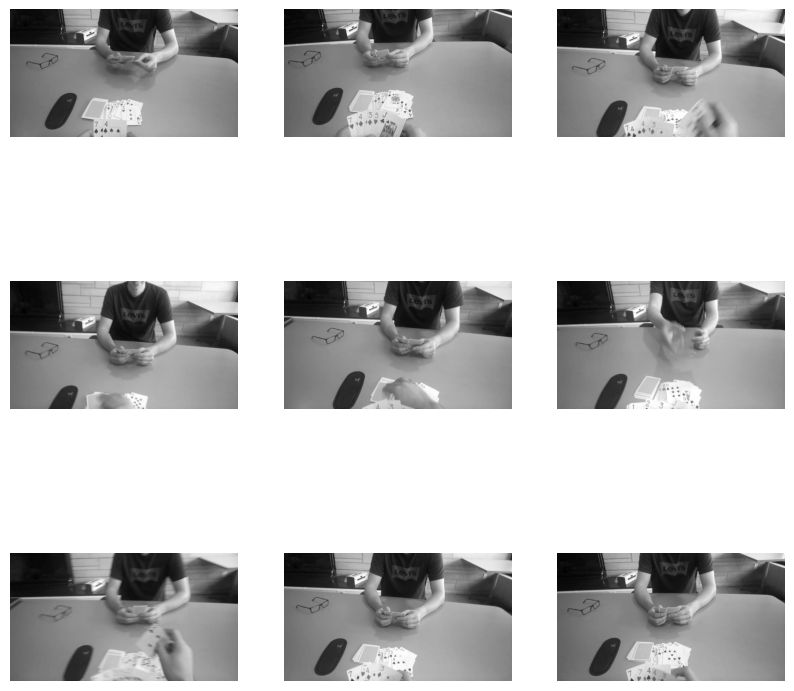

In [ ]:
# skimage.color.rgb2gray(an_img) <-- you may want to check this function
from skimage import color

# Your code here
gray_scale_imgs = [color.rgb2gray(img) for img in imgs]
##

# Use your draw function to visualize the images
draw_func(gray_scale_imgs) # assuming that gray_scale_imgs is the name of the list

# Apply histogram equalization on the gray scale images

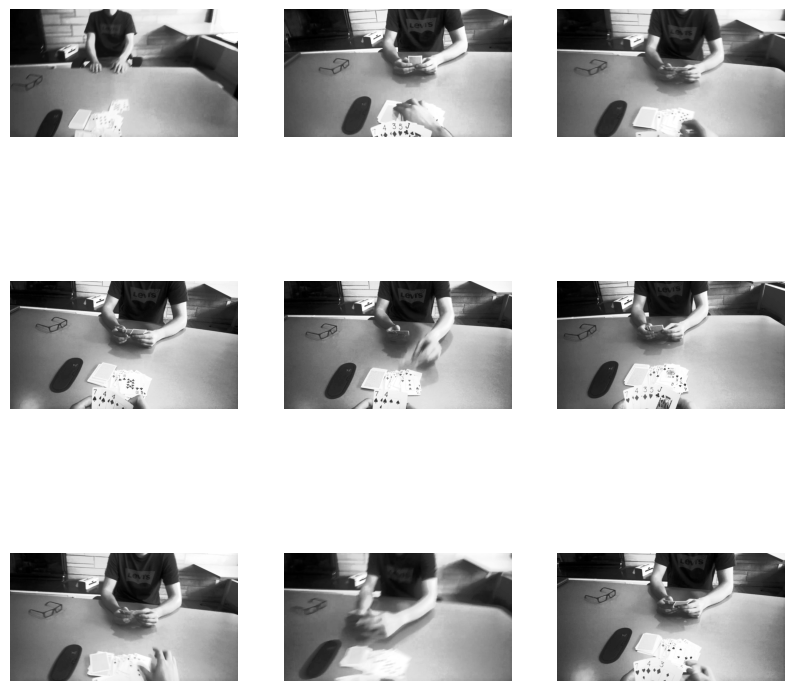

In [ ]:
from skimage import exposure # You will probably need this function

# Your code here
equ_imgs = [exposure.equalize_hist(img) for img in gray_scale_imgs]
##

# Use your draw function to visualize the images
draw_func(equ_imgs)

# Apply sobel edge detection on the equalized images

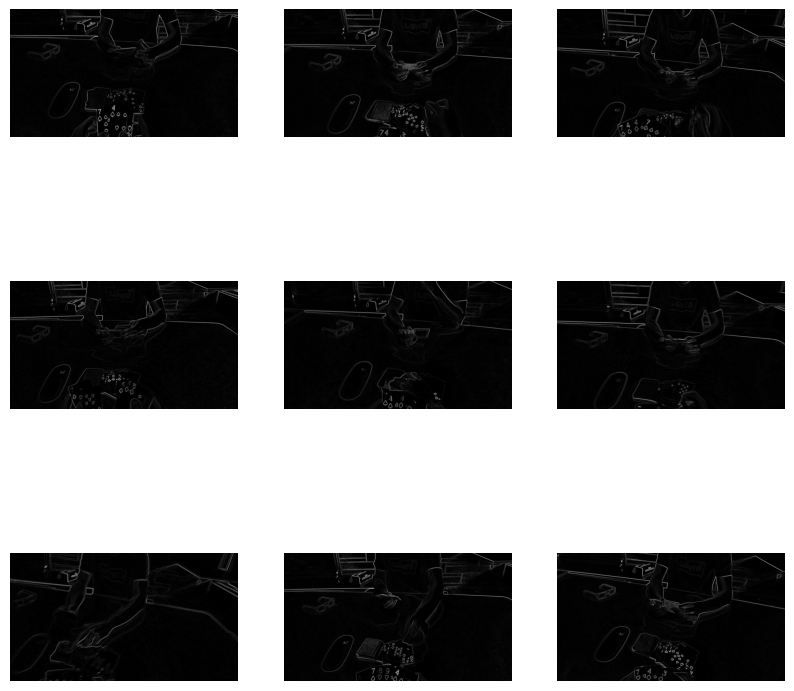

In [ ]:
from skimage.filters import sobel # You will probably need this function

# Your code here
sobel_imgs = [sobel(img) for img in equ_imgs]
##

# Use your draw function to visualize the images
draw_func(sobel_imgs)

# Apply Gaussian derivative over the equalized images

<ipython-input-18-affd3161aa98>:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  gaussF = scipy.ndimage.filters.gaussian_filter(weights, 1.5, order=0, truncate=3.0)


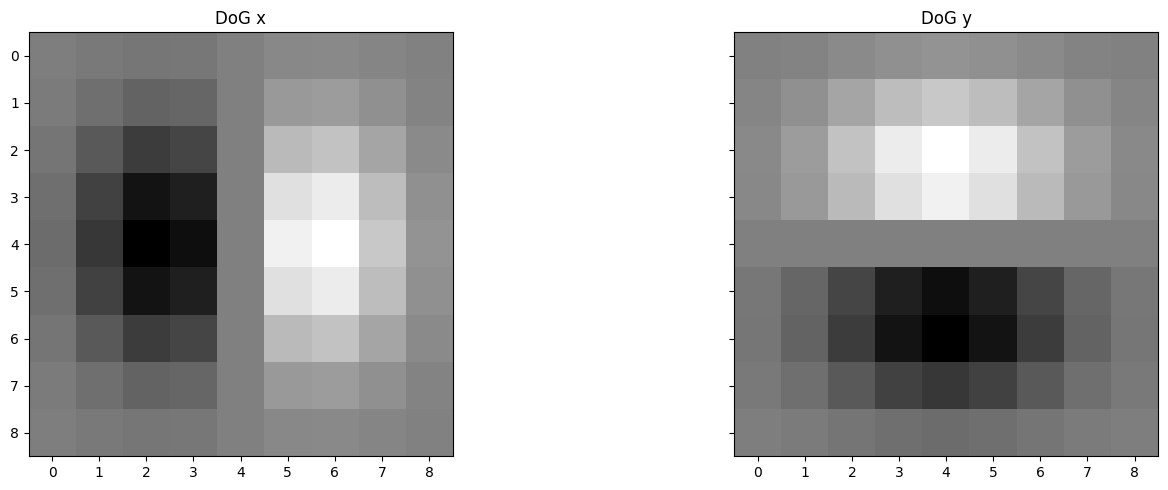

In [ ]:
import scipy.ndimage

# Gaussian filter
weights = np.zeros((9, 9))
weights[4, 4] = 1.0
gaussF = scipy.ndimage.filters.gaussian_filter(weights, 1.5, order=0, truncate=3.0)

#Sobel mask in x
weights = np.zeros((3,3))
weights[:,0] = -np.ones((3,))
weights[:,2] = np.ones((3,))
DoGx = scipy.ndimage.convolve(gaussF, weights)

#Sobel mask in y
weights = np.zeros((3,3))
weights[0,:] = np.ones((3,))
weights[2,:] = -np.ones((3,))
DoGy = scipy.ndimage.convolve(gaussF, weights)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 5))

ax[0].imshow(DoGx, cmap=plt.cm.gray)
ax[0].set_title('DoG x')

ax[1].imshow(DoGy, cmap=plt.cm.gray)
ax[1].set_title('DoG y')

plt.tight_layout()
plt.show()

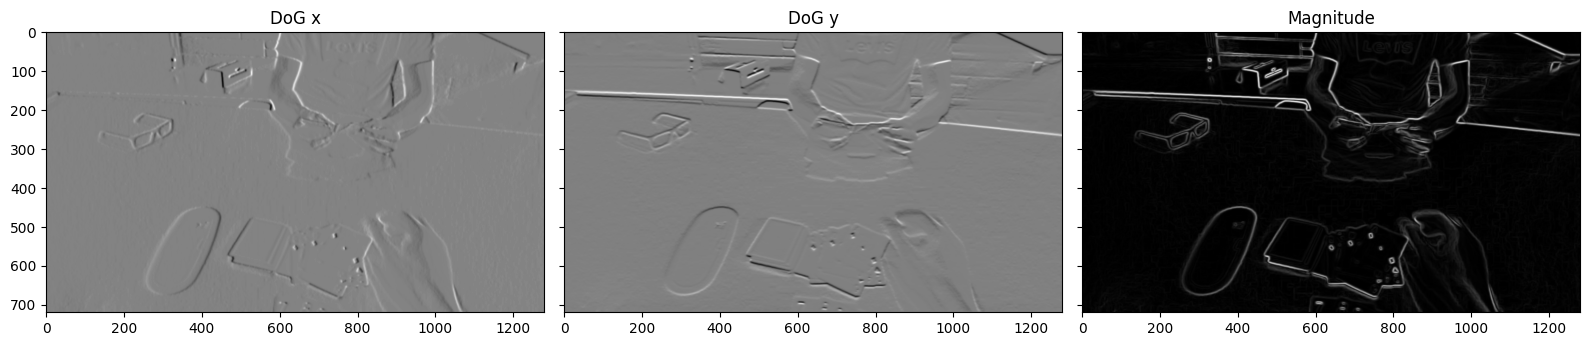

In [ ]:
devX = [scipy.ndimage.convolve(img, DoGx) for img in equ_imgs]
devY = [scipy.ndimage.convolve(img, DoGy) for img in equ_imgs]

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16, 5))

ax[0].imshow(devX[0], cmap=plt.cm.gray)
ax[0].set_title('DoG x')

ax[1].imshow(devY[0], cmap=plt.cm.gray)
ax[1].set_title('DoG y')

ax[2].imshow(np.sqrt(np.square(devX[0]) + np.square(devY[0])), cmap=plt.cm.gray)
ax[2].set_title('Magnitude')

plt.tight_layout()
plt.show()

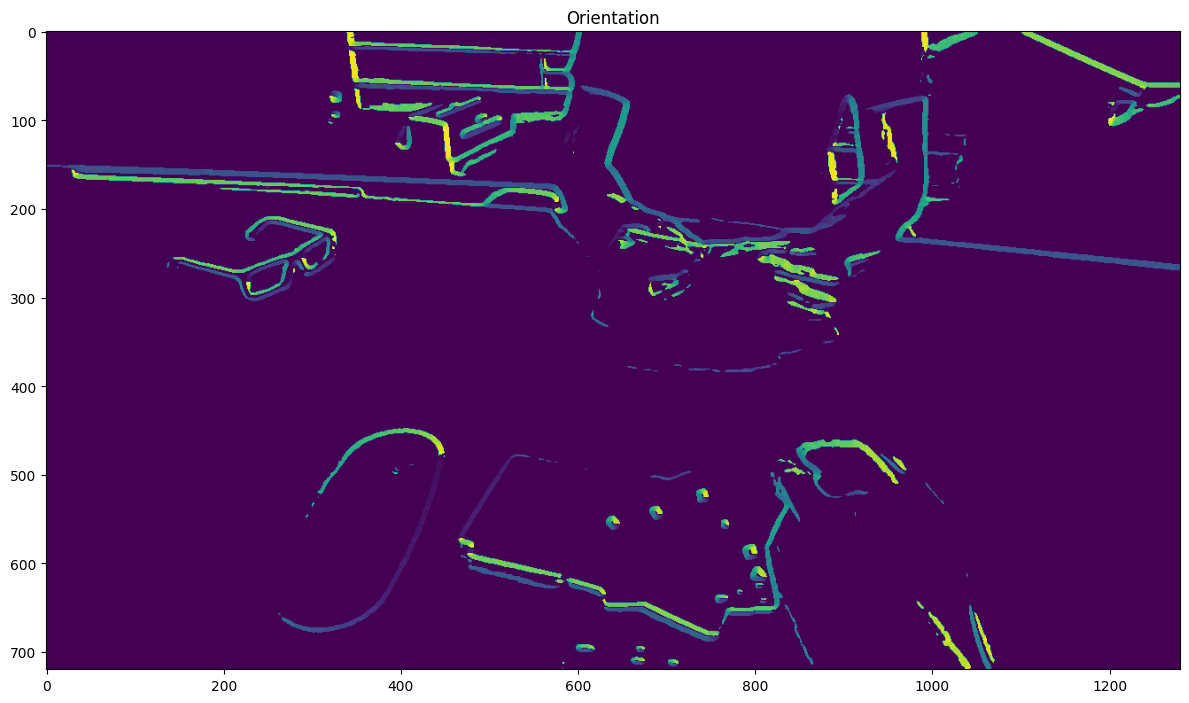

In [ ]:
import math

fig = plt.figure(figsize=(12, 8))

# Calculate the angle but threshold with magnitude
mag = np.sqrt(np.square(devX) + np.square(devY))
angle = np.arctan2(-devY[0], devX[0]) + math.pi

non_edge_indices = mag[0] < 0.18
angle[non_edge_indices] = 0

ax = plt.imshow(angle)
#
plt.title('Orientation')
plt.tight_layout()
plt.show()

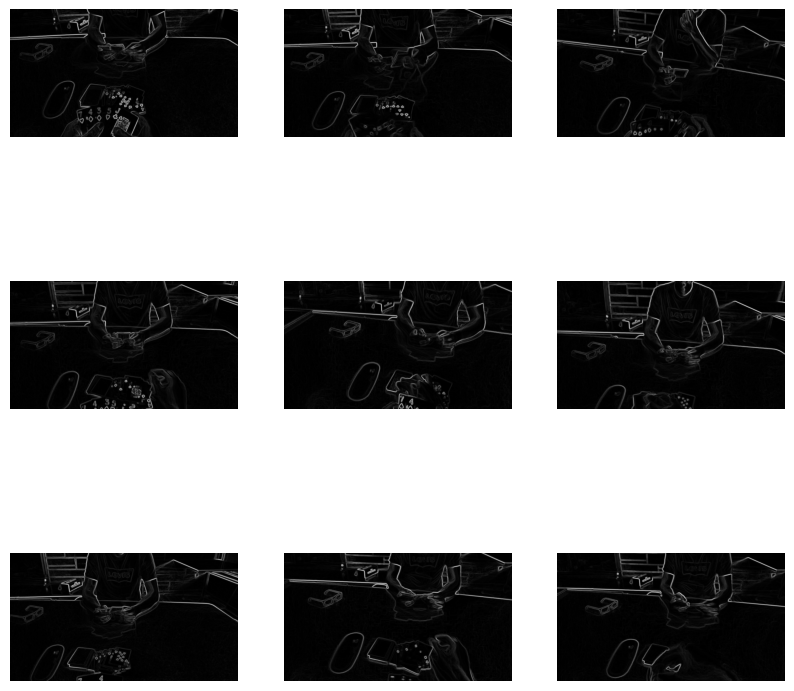

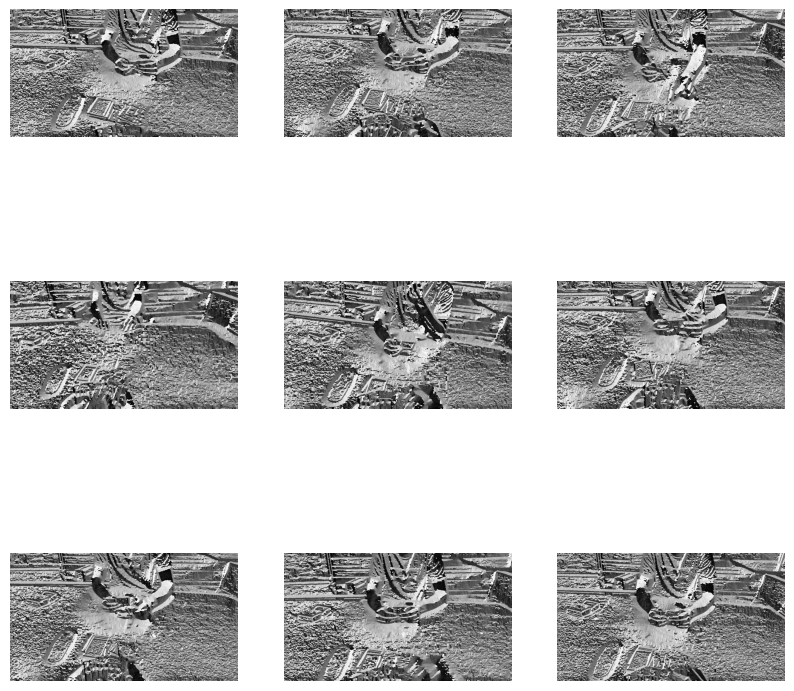

In [ ]:
# you better check lab 1 notebook
import scipy.ndimage

# Gaussian filter
weights = np.zeros((9, 9))
weights[4, 4] = 1.0
gaussF = scipy.ndimage.filters.gaussian_filter(weights, 1.5, order=0, truncate=3.0)

#Sobel mask in x
weights = np.zeros((3,3))
weights[:,0] = -np.ones((3,))
weights[:,2] = np.ones((3,))
DoGx = scipy.ndimage.convolve(gaussF, weights)

#Sobel mask in y
weights = np.zeros((3,3))
weights[0,:] = np.ones((3,))
weights[2,:] = -np.ones((3,))
DoGy = scipy.ndimage.convolve(gaussF, weights)

# Your code here
devX = [scipy.ndimage.convolve(img, DoGx) for img in equ_imgs] # Derivative in the X direction
devY = [scipy.ndimage.convolve(img, DoGy) for img in equ_imgs] # Derivative in the Y direction
##
mag_imgs = [np.sqrt(dx**2 + dy**2) for dx, dy in zip(devX, devY)]
angle = [np.arctan2(dy, dx) for dx, dy in zip(devX, devY)]

# Use your draw function to visualize the magnitude
draw_func(mag_imgs)

# Use your draw function to visualize the orientation
draw_func(angle)

# Bonus: Search for super pixeling and apply it

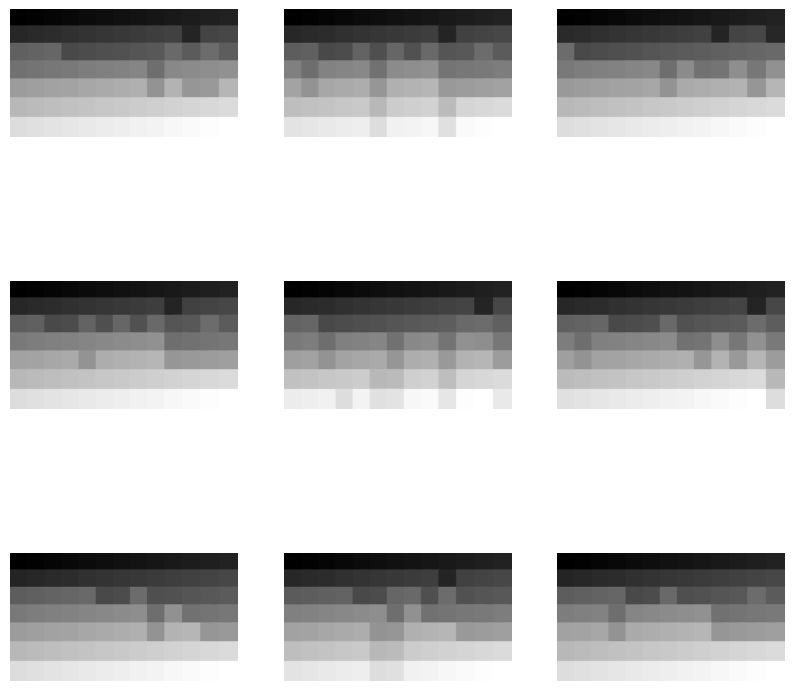

In [ ]:
from skimage.segmentation import slic

# Your code here
super_pixels = [slic(img, n_segments=100, compactness=10) for img in equ_imgs]
##

# Use your draw function to visualize the results
draw_func(super_pixels)